In [1]:
import torch as pt
import torchvision as tv
import matplotlib.pyplot as plt
from torchinfo import summary

import data_setup
import engine

In [2]:
device = 'cuda' if pt.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
import os
import zipfile

from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

    # Remove .zip file
    os.remove(data_path / "pizza_steak_sushi.zip")

data/pizza_steak_sushi directory exists.


In [4]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

In [5]:
# This basically takes the default transforms for EfficientNet_B0_Weights
weights = tv.models.EfficientNet_B0_Weights.DEFAULT

auto_transforms = weights.transforms()
print(weights, "\n\n", auto_transforms)

EfficientNet_B0_Weights.IMAGENET1K_V1 

 ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


In [6]:
train_dataloader, test_dataloader, class_names, train_dataset, test_dataset = data_setup.create_dataloaders(train_dir=train_dir, test_dir=test_dir, transform=auto_transforms, batch_size=32, num_workers=0)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x127714ed0>,
 ['pizza', 'steak', 'sushi'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


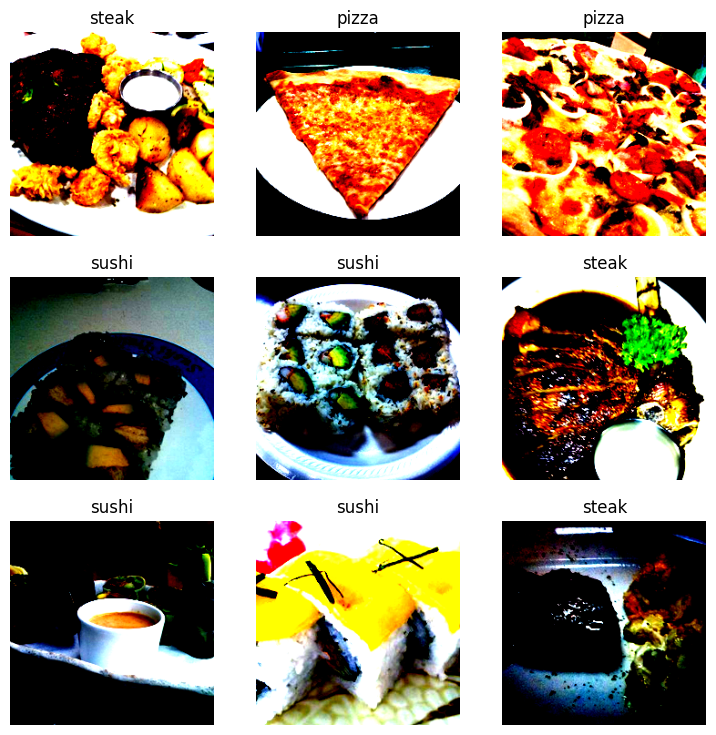

In [10]:
from ml_funcs import view
view.rand_images(
    test_dataset,
    42,
    3,
    3,
    (9,9)
)

In [ ]:
model = tv.models.efficientnet_b0(weights=weights)